# CI project :Natural-inspired pattern Recognition for Classification Problem 



### Hyperparameter Optimization (HPO) of Machine Learning Models ا
####  Tradional Algorithms versus Natural inspired Algorithms 

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score
from sklearn import datasets 
from sklearn.svm import SVC ,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import time
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve

## Load MNIST dataset
The MNIST database  is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database has a training set of 60,000 examples, and a test set of 10,000 examples.

In [8]:
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target 

## Baseline Machine Learning Models: Classifiers with Default Hyperparameters

### Using 3-Fold Cross-Validation

In [9]:
# Randomforest
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf ,X , y, cv=3 ,scoring='accuracy' )
random_forest_accuracy = scores.mean()
print("Accuracy :"+str(scores.mean()))

Accuracy :0.9410127991096271


In [10]:
#SVM
clf = SVC()
clf.fit(X,y)
scores = cross_val_score(clf, X ,y, cv=3 , scoring ='accuracy')
svc_accuracy = scores.mean()
print("Accuracy:"+ str(scores.mean()))


Accuracy:0.9699499165275459


In [11]:
#KNN
clf = KNeighborsClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
knn_accuracy= scores.mean()
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9627156371730662


## Traditional Parameter tunning Methods  Algorithm 1: Grid Search
Search all the given hyper-parameter configurations

**Advantages:**
* Simple implementation.  

**Disadvantages:**  
* Time-consuming,
* Only efficient with categorical HPs.

In [12]:
# Random forest optimized by gridSearchCv
from sklearn.model_selection import GridSearchCV
# Define hyperparameter Configuration space
rf_params = {
    'n_estimators' :[10,20,30],
    #'max_features': ['sqrt',0.5],
    'max_depth' :[15,20,30,40,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid=GridSearchCV(clf,rf_params,cv=3,scoring='accuracy')
grid.fit(X,y)
print(grid.best_params_)
random_forest_accuracy_bygridsearch = grid.best_score_
print("Accuracy:"+str(grid.best_score_))
    


{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}
Accuracy:0.9360044518642182


In [13]:
# SVM optimized by GridSearchCv 
from sklearn.model_selection import GridSearchCV
#Define hyperparameter Configuration space 
svm_params = {
    'C':[1,10,100],
    'kernel' :['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid =GridSearchCV(clf,svm_params ,cv=3 ,scoring = 'accuracy')
grid.fit(X,y)
print(grid.best_params_)
svc_accuracy_bygridsearch = grid.best_score_
print("Accuracy:"+str(grid.best_score_))

{'C': 10, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


In [14]:
#KNN optimized by GridsearchCV
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20],
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
knn_accuracy_bygridsearch= grid.best_score_
print("Accuracy:"+ str(grid.best_score_))

{'n_neighbors': 3}
Accuracy:0.9682804674457429


##  Algorithm 2: Random Search
Randomly search hyper-parameter combinations in the search space

**Advantages:**
* More efficient than GS.
* Enable parallelization. 

**Disadvantages:**  
* Not consider previous results.
* Not efficient with conditional HPs.

In [15]:
#Random Forest
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestClassifier(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
random_forest_accuracy_byrandomsearch=Random.best_score_
print("Accuracy:"+ str(Random.best_score_))

{'criterion': 'entropy', 'max_depth': 29, 'max_features': 13, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 79}
Accuracy:0.9265442404006677


In [16]:
#SVM
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
n_iter_search=20
clf = SVC(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
svc_accuracy_byrandomsearch=Random.best_score_
print("Accuracy:"+ str(Random.best_score_))

{'C': 43.70945035075695, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


In [17]:
#KNN
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
n_iter_search=10
clf = KNeighborsClassifier()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
knn_accuracy_byrandomsearch=Random.best_score_
print("Accuracy:"+ str(Random.best_score_))

{'n_neighbors': 3}
Accuracy:0.9682804674457429


# Standard BFO Implementation (C + gamma)

**Description**:  
This cell implements the classic Bacterial Foraging Optimization (BFO) algorithm to optimize the SVC hyperparameters `C` and `gamma` using the RBF kernel.  
It includes chemotaxis, reproduction, and elimination-dispersal phases, with a caching mechanism for faster fitness evaluation.

✅ Output: Best parameters, best accuracy, and training time.



In [18]:
# Load and scale data
dataset = load_digits()
X = dataset.data
y = dataset.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fitness cache
fitness_cache = {}

def fitness_function(params):
    key = tuple(np.round(params, 5))  # rounded key for caching
    if key in fitness_cache:
        return fitness_cache[key]
    C, gamma = params
    model = SVC(C=C, gamma=gamma, kernel='rbf')
    score = cross_val_score(model, X, y, cv=3, scoring='accuracy', n_jobs=-1).mean()
    fitness_cache[key] = score
    return score

# BFO Parameters
n_bacteria = 10
n_elimination_dispersal = 1
n_reproduction = 2
n_chemotaxis = 5
n_swim = 3
step_size = 0.1

# Parameter bounds
bounds = np.array([
    [0.01, 100],      # C
    [0.0001, 1.0]     # gamma
])

# Initialize population
np.random.seed(42)
population = np.random.uniform(bounds[:, 0], bounds[:, 1], (n_bacteria, 2))

best_score = -np.inf
best_params = None
start_time = time.time()

for elim_disp in range(n_elimination_dispersal):
    for repro in range(n_reproduction):
        health = []
        for i in range(n_bacteria):
            position = population[i].copy()
            score = fitness_function(position)
            health_i = 0

            for j in range(n_chemotaxis):
                delta = np.random.uniform(-1, 1, 2)
                delta = delta / np.linalg.norm(delta)
                new_position = position + step_size * delta
                new_position = np.clip(new_position, bounds[:, 0], bounds[:, 1])
                new_score = fitness_function(new_position)

                swim_count = 0
                while new_score > score and swim_count < n_swim:
                    position = new_position
                    score = new_score
                    new_position = position + step_size * delta
                    new_position = np.clip(new_position, bounds[:, 0], bounds[:, 1])
                    new_score = fitness_function(new_position)
                    swim_count += 1

                health_i += score

                if score > best_score:
                    best_score = score
                    best_params = position.copy()

            health.append((health_i, i))

        # Reproduction
        health.sort(reverse=True)
        sorted_indices = [idx for _, idx in health]
        half = n_bacteria // 2
        for i in range(half):
            population[sorted_indices[half + i]] = population[sorted_indices[i]].copy()

    # Elimination and dispersal
    for i in range(n_bacteria):
        if np.random.rand() < 0.25:
            population[i] = np.random.uniform(bounds[:, 0], bounds[:, 1])

end_time = time.time()

best_accuracy= best_score
# Output
print("\n Best Parameters found by BFO:")
print(f"C = {best_params[0]:.5f}")
print(f"gamma = {best_params[1]:.5f}")
print(f"Best Accuracy (CV) = {best_score:.4f}")
bfo_time= end_time- start_time
print(f"Training Time = {end_time - start_time:.2f} seconds")



 Best Parameters found by BFO:
C = 15.37482
gamma = 0.01370
Best Accuracy (CV) = 0.9599
Training Time = 60.06 seconds


# Compare SVC Optimizers: Default vs Grid vs Random vs BFO

**Description**:  
This cell compares four different methods to train and tune an SVC classifier:
- Default parameters  
- Grid Search  
- Randomized Search  
- BFO (from the previous cell)

It records training time and accuracy for each method, and stores them in a structured DataFrame for later plotting.


In [19]:
import time
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy import stats

# --- Default SVC ---
start = time.time()
clf = SVC()
clf.fit(X, y)
end = time.time()
default_time = end - start

# --- Grid Search SVC ---
start = time.time()
grid = GridSearchCV(SVC(gamma='scale'), {'C': [1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}, cv=3, scoring='accuracy')
grid.fit(X, y)
end = time.time()
grid_time = end - start

# --- Random Search SVC ---
start = time.time()
random = RandomizedSearchCV(SVC(gamma='scale'),
                            {'C': stats.uniform(0, 50), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                            cv=3, n_iter=20, scoring='accuracy')
random.fit(X, y)
end = time.time()
random_time = end - start

# --- Averages for Accuracy (assuming these variables are defined beforehand) ---
default_accuracy = np.mean([knn_accuracy, svc_accuracy, random_forest_accuracy])
grid_accuracy = np.mean([knn_accuracy_bygridsearch, svc_accuracy_bygridsearch, random_forest_accuracy_bygridsearch])
random_accuracy = np.mean([knn_accuracy_byrandomsearch, svc_accuracy_byrandomsearch, random_forest_accuracy_byrandomsearch])

# bfo_time and best_accuracy should be already calculated from your BFO optimization step
results_df = pd.DataFrame({
    'Method': ['Default', 'Grid Search', 'Random Search', 'BFO standerd'],
    'Training Time (s)': [default_time, grid_time, random_time, bfo_time],
    'Accuracy': [default_accuracy, grid_accuracy, random_accuracy, best_accuracy]
})

print(results_df)


          Method  Training Time (s)  Accuracy
0        Default           0.082546  0.957893
1    Grid Search           2.116487  0.959377
2  Random Search           3.365652  0.956223
3   BFO standerd          60.061752  0.959933


# Plot Accuracy and Training Time Comparisons

**Description**:  
This cell visualizes the comparison results using bar plots:
- Accuracy comparison of all SVC methods
- Training time comparison of all methods

The goal is to compare both efficiency and effectiveness of different optimization techniques.


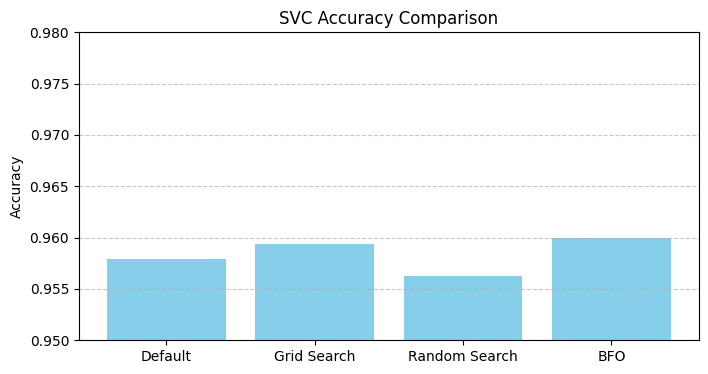

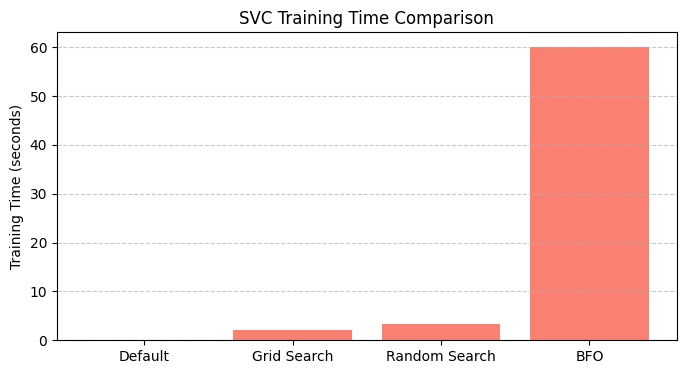

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# prepare the data
df = pd.DataFrame({
    'Method': ['Default', 'Grid Search', 'Random Search', 'BFO'],
    'Training Time (s)': [default_time, grid_time, random_time, bfo_time],
    'Accuracy': [default_accuracy, grid_accuracy, random_accuracy, best_accuracy]


})

# plot accuracy comparison
plt.figure(figsize=(8, 4))
plt.bar(df['Method'], df['Accuracy'], color='skyblue')
plt.title('SVC Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.95, 0.98)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# plot training time comparison
plt.figure(figsize=(8, 4))
plt.bar(df['Method'], df['Training Time (s)'], color='salmon')
plt.title('SVC Training Time Comparison')
plt.ylabel('Training Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Learning Curve Comparison: SVC
**Description**:  
This cell generates learning curves for three models (SVC, Random Forest, KNN) using 3-fold cross-validation.  
It plots training vs testing accuracy as the training size increases from 10% to 100% of the data.

✅ Helps assess model performance, data sufficiency, and generalization behavior.


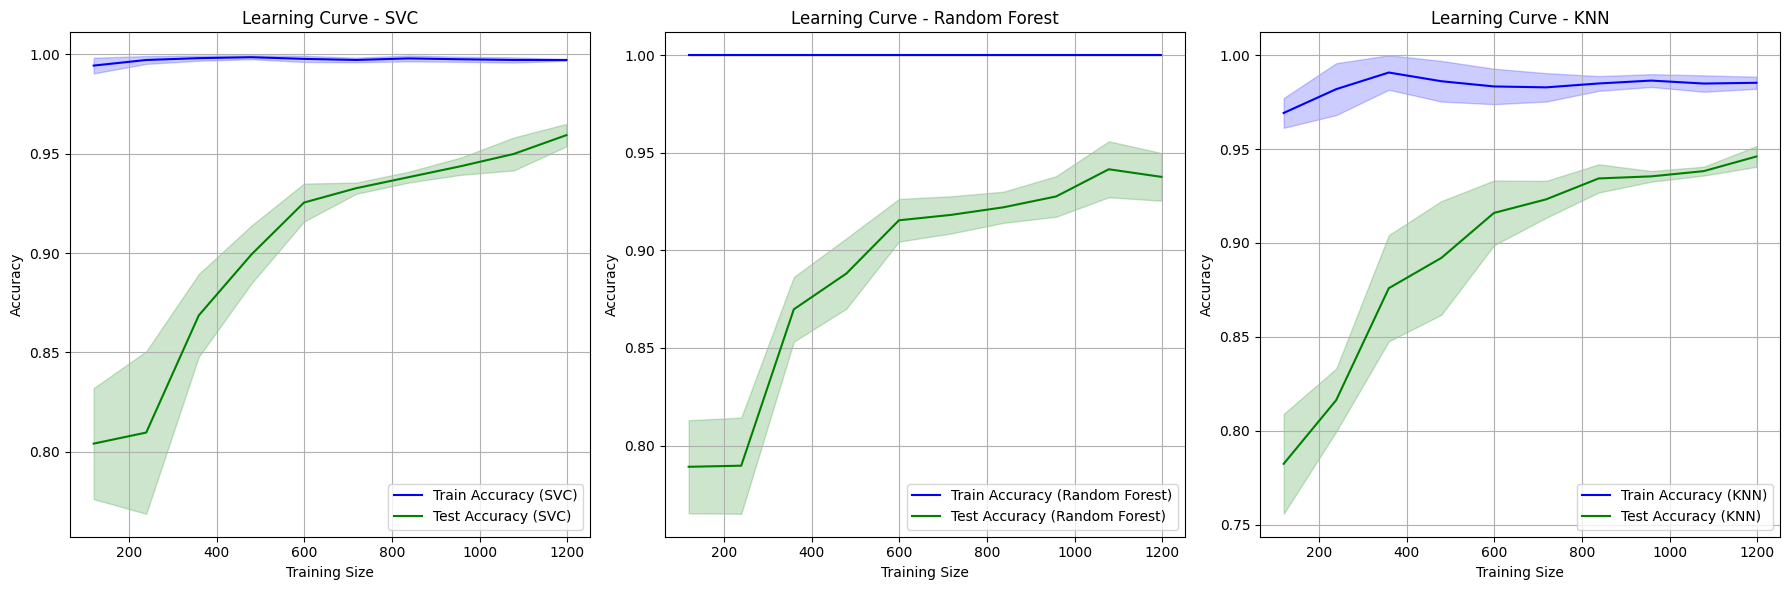

In [21]:
from sklearn.model_selection import learning_curve

# Define models
models = {
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Set up the plot
plt.figure(figsize=(18, 6))

for idx, (name, model) in enumerate(models.items(), start=1):
    # Get the learning curve data
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    
    # Calculate the mean and std deviation for plotting
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot learning curves
    plt.subplot(1, 3, idx)
    plt.plot(train_sizes, train_mean, label=f'Train Accuracy ({name})', color='blue')
    plt.plot(train_sizes, test_mean, label=f'Test Accuracy ({name})', color='green')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Validation Curve for SVC (Hyperparameter: C)

**Description**:  
This cell plots a validation curve for the SVC model with an RBF kernel and fixed gamma=0.01.  
It shows how the training and cross-validation accuracy vary with different values of the `C` parameter (log scale).  

✅ Helps identify underfitting, overfitting, and the optimal `C` value for generalization.


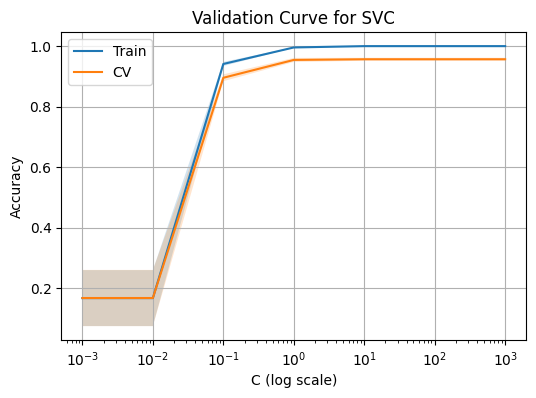

In [22]:


param_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', gamma=0.01),
    X, y,
    param_name="C",
    param_range=param_range,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean  = np.mean(test_scores,  axis=1)

plt.figure(figsize=(6,4))
plt.semilogx(param_range, train_mean, label="Train")
plt.semilogx(param_range, test_mean,  label="CV")
plt.fill_between(param_range, train_mean - np.std(train_scores, axis=1),
                 train_mean + np.std(train_scores, axis=1), alpha=0.2)
plt.fill_between(param_range, test_mean  - np.std(test_scores, axis=1),
                 test_mean  + np.std(test_scores, axis=1), alpha=0.2)
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for SVC')
plt.legend()
plt.grid(True)
plt.show()


# Cross-Validation Accuracy Distribution (Boxplot)

**Description**:  
This cell compares the accuracy distribution of different SVC models using 5-fold Stratified Cross-Validation.  
Models include: Default SVC, Grid Search-tuned SVC, Random Search, and BFO-optimized SVC.  
A boxplot is used to visualize the variation and consistency of accuracy across folds.

✅ Useful for assessing model stability and variance, not just mean performance.


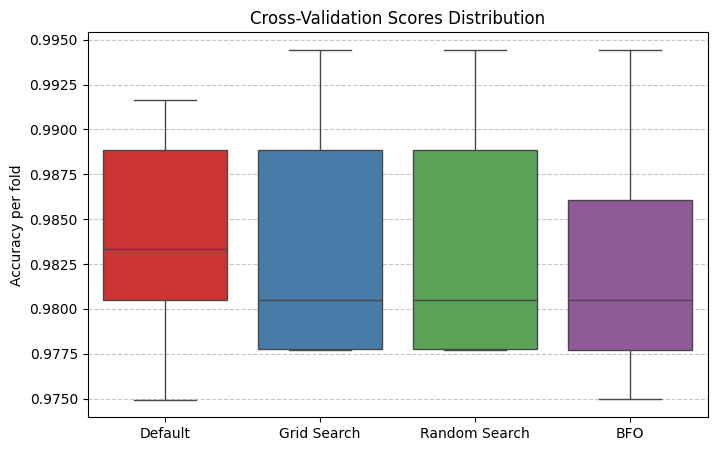

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

methods = {
    'Default': SVC(),
    'Grid Search': SVC(C=10, kernel='rbf'),
    'Random Search': SVC(C=6.7, kernel='rbf'),
    'BFO': SVC(C=15.3748, gamma=0.0137)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dict = {name: cross_val_score(model, X, y, cv=cv, scoring='accuracy') 
               for name, model in methods.items()}

strong_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3'] 

plt.figure(figsize=(8,5))
sns.boxplot(data=list(scores_dict.values()), palette=strong_colors)
plt.xticks(range(len(scores_dict)), list(scores_dict.keys()))
plt.ylabel('Accuracy per fold')
plt.title('Cross-Validation Scores Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
